Found 8000 files belonging to 10 classes.
Using 6400 files for training.
Found 8000 files belonging to 10 classes.
Using 1600 files for validation.
Clases detectadas: ['bart_simpson', 'charles_montgomery_burns', 'homer_simpson', 'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'principal_skinner']
Epoch 1/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.1065 - loss: 4.3384 - val_accuracy: 0.1469 - val_loss: 2.7174
Epoch 2/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.1744 - loss: 2.5755 - val_accuracy: 0.2087 - val_loss: 2.3362
Epoch 3/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.2294 - loss: 2.2957 - val_accuracy: 0.2669 - val_loss: 2.2241
Epoch 4/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.2651 - loss: 2.1887 - val_accuracy: 0.2731 - val_loss: 2.1674
Epoch 5/70
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.2915 - loss: 2.1321 - val_accuracy: 0.3137 - val_loss: 2.

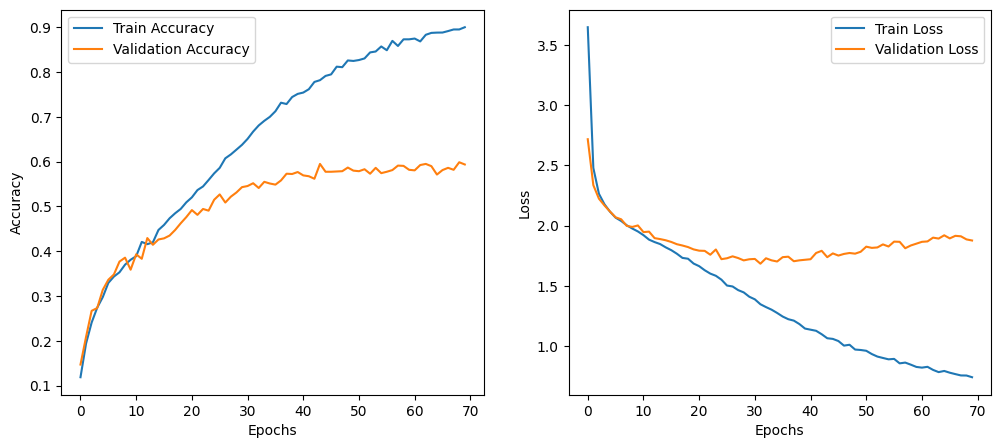

In [11]:
#1 PROGRAMA PRUEBA NO TOCAR!!
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
import zipfile
import pathlib

# 1️⃣ Descomprimir los datasets
with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/Simpsons/DATOS')

# 2️⃣ Definir directorio de datos
data_dir = pathlib.Path("/Simpsons/DATOS/train")

# 3️⃣ Definir nombres de clases manualmente
class_names = [
    "bart_simpson", "charles_montgomery_burns", "homer_simpson",
    "krusty_the_clown", "lisa_simpson", "marge_simpson",
    "milhouse_van_houten", "moe_szyslak", "ned_flanders", "principal_skinner"
]

# 4️⃣ Cargar dataset utilizando image_dataset_from_directory
batch_size = 64                #<-----MODIFICAR EL TAMAÑO DEL BATCH
img_size = (28, 28)            #<-----MODIFICAR EL TAMAÑO DE LAS IMAGENES

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int"
)

# 5️⃣ Verificar etiquetas asignadas
print("Clases detectadas:", train_ds.class_names)

# 6️⃣ Normalización de los valores de píxeles (0-255 → 0-1)
def normalize(image, label):
    return image / 255.0, label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

# 7️⃣ Modelo MLP
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.005)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.005)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# 8️⃣ Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0005),  #<-----AJUSTRA LA TASA DE APRENDIZAJE
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 9️⃣ Entrenar el modelo
epochs = 70                                       #<-----AJUSTRA EL numero de epocas
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# 🔟 Graficar resultados
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00


Found 8000 files belonging to 10 classes.
Using 6400 files for training.
Found 8000 files belonging to 10 classes.
Using 1600 files for validation.
Clases detectadas: ['bart_simpson', 'charles_montgomery_burns', 'homer_simpson', 'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'principal_skinner']
Tamaño del dataset de entrenamiento: 25
Tamaño del dataset de validación: 7
Epoch 1/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 440ms/step - accuracy: 0.1060 - loss: 3.3429 - val_accuracy: 0.1731 - val_loss: 3.1220
Epoch 2/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.1729 - loss: 3.0540 - val_accuracy: 0.1794 - val_loss: 2.8522
Epoch 3/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - accuracy: 0.2142 - loss: 2.7865 - val_accuracy: 0.2681 - val_loss: 2.6406
Epoch 4/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.2577 - loss: 2.6036 - val_accuracy: 0.2619 - val_loss: 2.5159
Epoch 5/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step 

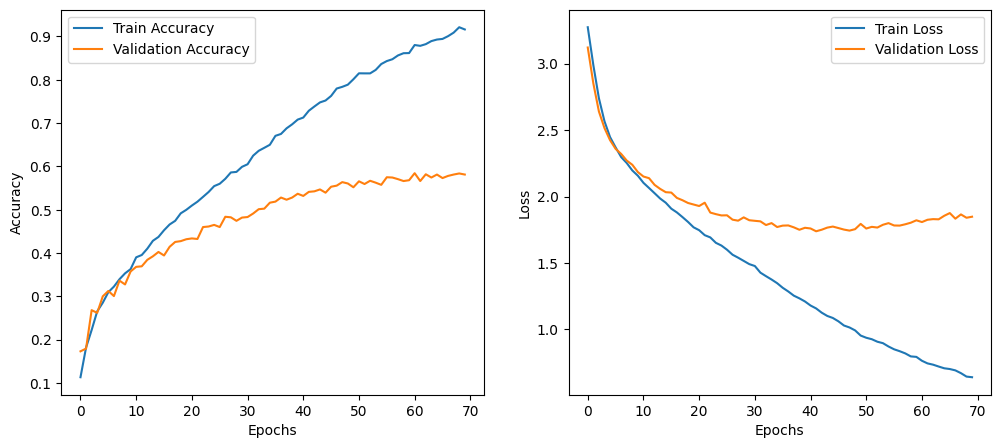

Reloading Tuner from my_dir/simpsons_mlp/tuner0.json
Search space summary
Default search space size: 25
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 8, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': 'linear'}
dropout_0 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.2, 'c

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 832)                 │         653,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 832)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 960)                 │         799,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 960)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           9,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,462,410 (5.58 MB)

 Trainable params: 1,462,410 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2595 - loss: 2.2587 - val_accuracy: 0.2694 - val_loss: 2.1926
Epoch 2/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.2856 - loss: 2.1443 - val_accuracy: 0.2719 - val_loss: 2.1955
Epoch 3/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.3011 - loss: 2.1113 - val_accuracy: 0.2856 - val_loss: 2.1712
Epoch 4/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.2965 - loss: 2.1068 - val_accuracy: 0.2925 - val_loss: 2.1619
Epoch 5/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.3039 - loss: 2.0935 - val_accuracy: 0.3025 - val_loss: 2.1455
Epoch 6/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3113 - loss: 2.0636 - val_accuracy: 0.2950 - val_loss: 2.1503
Epoch 7/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.3022 - loss: 2.0817 - val_accuracy: 0.3187 - val_loss: 2.1313
Epoch 8/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.3261 - loss: 2.0599 - val_accuracy: 0.3044 -

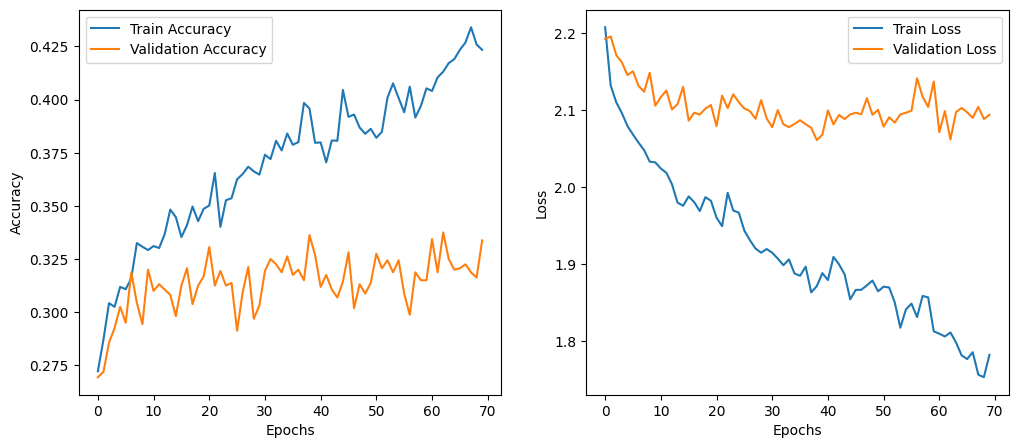

In [19]:
#2 PROGRAMA (HIPERPARAMETROS AÑADIDOS)(PRUEBA N4)(Mejores Resultados)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
from tensorflow.keras.regularizers import l2
import zipfile
import pathlib
from sklearn.model_selection import train_test_split

# 1️⃣ Descomprimir los datasets
with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/Simpsons/DATOS')

# 2️⃣ Definir directorio de datos
data_dir = pathlib.Path("/Simpsons/DATOS/train")

# 3️⃣ Definir nombres de clases manualmente
class_names = [
    "bart_simpson", "charles_montgomery_burns", "homer_simpson",
    "krusty_the_clown", "lisa_simpson", "marge_simpson",
    "milhouse_van_houten", "moe_szyslak", "ned_flanders", "principal_skinner"
]

# 4️⃣ Cargar dataset utilizando image_dataset_from_directory
batch_size = 256             #<----- Incrementar el tamaño del batch
img_size = (28, 28)            #<----- Mantener el tamaño de las imágenes

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

# Verificar etiquetas asignadas
print("Clases detectadas:", train_ds.class_names)

# Normalización de los valores de píxeles (0-255 → 0-1)
def normalize(image, label):
    return image / 255.0, label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

# Verificar el contenido de los datasets
print(f"Tamaño del dataset de entrenamiento: {len(train_ds)}")
print(f"Tamaño del dataset de validación: {len(val_ds)}")

# Definir el modelo MLP
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # Incrementar el número de unidades
    Dropout(0.2),  # Ajustar la tasa de dropout
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0003),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con manejo de errores y verbose para ver progreso
epochs = 70
try:
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)
except Exception as e:
    print(f"Error durante el entrenamiento: {e}")

# Graficar resultados si el entrenamiento fue exitoso
if 'history' in locals():
    def plot_history(history):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    plot_history(history)

# 3️⃣ Herramienta de selección de hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Flatten())
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), 64, 2048, step=64),  # Ajustar el rango de unidades
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), 0.1, 0.4, step=0.1)))  # Ajustar el rango de dropout
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-3, sampling='LOG')),  # Ajustar el rango de tasa de aprendizaje
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,  # Aumentar el número de pruebas
                     executions_per_trial=3,  # Aumentar el número de ejecuciones por prueba
                     directory='my_dir',
                     project_name='simpsons_mlp')

tuner.search_space_summary()

tuner.search(train_ds, epochs=20, validation_data=val_ds)  # Aumentar el número de épocas

tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]

# Entrenar el mejor modelo con los datos de entrenamiento y validación y verbose
best_model.summary()
history = best_model.fit(train_ds, validation_data=val_ds, epochs=70, verbose=1)

# Evaluar el modelo en el conjunto de prueba (test)
test_loss, test_acc = best_model.evaluate(val_ds)
print(f'\nTest Accuracy: {test_acc}')

# Graficar resultados finales
if 'history' in locals():
    plot_history(history)


In [17]:
#3 PROGRAMA (HIPERPARAMETROS AÑADIDOS)(Early_stopping AÑADIDOS)(PRUEBA N4)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping  # Importar EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau # Importar ReduceLROnPlateau

import zipfile
import pathlib
from sklearn.model_selection import train_test_split

# 1️⃣ Descomprimir los datasets
with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/Simpsons/DATOS')

# 2️⃣ Definir directorio de datos
data_dir = pathlib.Path("/Simpsons/DATOS/train")

# 3️⃣ Definir nombres de clases manualmente
class_names = [
    "bart_simpson", "charles_montgomery_burns", "homer_simpson",
    "krusty_the_clown", "lisa_simpson", "marge_simpson",
    "milhouse_van_houten", "moe_szyslak", "ned_flanders", "principal_skinner"
]

# 4️⃣ Cargar dataset utilizando image_dataset_from_directory
batch_size = 256             #<----- Incrementar el tamaño del batch
img_size = (28, 28)            #<----- Mantener el tamaño de las imágenes

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

# Verificar etiquetas asignadas
print("Clases detectadas:", train_ds.class_names)

# Normalización de los valores de píxeles (0-255 → 0-1)
def normalize(image, label):
    return image / 255.0, label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

# Verificar el contenido de los datasets
print(f"Tamaño del dataset de entrenamiento: {len(train_ds)}")
print(f"Tamaño del dataset de validación: {len(val_ds)}")

# Definir el modelo MLP
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # Incrementar el número de unidades
    Dropout(0.2),  # Ajustar la tasa de dropout
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0003),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Añadir callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con manejo de errores y verbose para ver progreso
epochs = 70
try:
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=[early_stopping])
except Exception as e:
    print(f"Error durante el entrenamiento: {e}")

# Graficar resultados si el entrenamiento fue exitoso
if 'history' in locals():
    def plot_history(history):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    plot_history(history)

# 3️⃣ Herramienta de selección de hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Flatten())
    for i in range(hp.Int('num_layers', 2, 6)):  # Aumentar el rango de número de capas
        model.add(Dense(units=hp.Int('units_' + str(i), 32, 2048, step=32),  # Ajustar el rango de unidades
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        if hp.Boolean('batch_norm_' + str(i)):  # Añadir opción de Batch Normalization
            model.add(tf.keras.layers.BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), 0.1, 0.5, step=0.05)))  # Ajustar el rango de dropout
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-6, 1e-2, sampling='LOG')),  # Ajustar el rango de tasa de aprendizaje
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=20,  # Aumentar el número de pruebas
                     executions_per_trial=5,  # Aumentar el número de ejecuciones por prueba
                     directory='my_dir',
                     project_name='simpsons_mlp')


tuner.search_space_summary()

## Añadir callback de EarlyStopping y ReduceLROnPlateau durante la búsqueda de hiperparámetros
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
tuner.search(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])  # Aumentar el número de épocas

tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]

# Entrenar el mejor modelo con los datos de entrenamiento y validación y verbose
best_model.summary()
history = best_model.fit(train_ds, validation_data=val_ds, epochs=70, verbose=1, callbacks=[early_stopping, reduce_lr])

# Evaluar el modelo en el conjunto de prueba (test)
test_loss, test_acc = best_model.evaluate(val_ds)
print(f'\nTest Accuracy: {test_acc}')


# Graficar resultados finales
if 'history' in locals():
    plot_history(history)


Trial 11 Complete [00h 09m 49s]
val_accuracy: 0.17787499725818634

Best val_accuracy So Far: 0.2762499948342641
Total elapsed time: 04h 38m 42s

Search: Running Trial #12

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_layers
928               |832               |units_0
0.4               |0.4               |dropout_0
0.0031522         |0.0010144         |learning_rate
928               |960               |units_1
0.4               |0.4               |dropout_1
800               |384               |units_2
0.4               |0.4               |dropout_2
704               |480               |units_3
0.3               |0.2               |dropout_3
64                |384               |units_4
0.4               |0.3               |dropout_4
960               |128               |units_5
0.3               |0.2               |dropout_5
736               |32                |units_6
0.2               |0.2               |dropout_6
32              

KeyboardInterrupt: 

In [ ]:
#4 PROGRAMA (HIPERPARAMETROS AÑADIDOS)(Early_stopping AÑADIDOS)(ReduceLRo AÑADIDOS)(PRUEBA N4)
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Importar EarlyStopping y ReduceLROnPlateau

import zipfile
import pathlib
from sklearn.model_selection import train_test_split

# 1️⃣ Descomprimir los datasets
with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/Simpsons/DATOS')

# 2️⃣ Definir directorio de datos
data_dir = pathlib.Path("/Simpsons/DATOS/train")

# 3️⃣ Definir nombres de clases manualmente
class_names = [
    "bart_simpson", "charles_montgomery_burns", "homer_simpson",
    "krusty_the_clown", "lisa_simpson", "marge_simpson",
    "milhouse_van_houten", "moe_szyslak", "ned_flanders", "principal_skinner"
]

# 4️⃣ Cargar dataset utilizando image_dataset_from_directory
batch_size = 256  # Incrementar el tamaño del batch
img_size = (28, 28)  # Mantener el tamaño de las imágenes

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

# Verificar etiquetas asignadas
print("Clases detectadas:", train_ds.class_names)

# Normalización de los valores de píxeles (0-255 → 0-1)
def normalize(image, label):
    return image / 255.0, label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

# Verificar el contenido de los datasets
print(f"Tamaño del dataset de entrenamiento: {len(train_ds)}")
print(f"Tamaño del dataset de validación: {len(val_ds)}")

# Definir el modelo MLP
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # Incrementar el número de unidades
    Dropout(0.2),  # Ajustar la tasa de dropout
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0003),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Añadir callbacks de EarlyStopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # Incrementar la paciencia
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)  # Ajustar el factor de reducción y la paciencia

# Entrenar el modelo con manejo de errores y verbose para ver progreso
epochs = 70
try:
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1, callbacks=[early_stopping, reduce_lr])
except Exception as e:
    print(f"Error durante el entrenamiento: {e}")

# Graficar resultados si el entrenamiento fue exitoso
if 'history' in locals():
    def plot_history(history):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    plot_history(history)

# 3️⃣ Herramienta de selección de hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Flatten())
    for i in range(hp.Int('num_layers', 2, 6)):  # Aumentar el rango de número de capas
        model.add(Dense(units=hp.Int('units_' + str(i), 32, 2048, step=32),  # Ajustar el rango de unidades
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        if hp.Boolean('batch_norm_' + str(i)):  # Añadir opción de Batch Normalization
            model.add(tf.keras.layers.BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), 0.1, 0.5, step=0.05)))  # Ajustar el rango de dropout
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-6, 1e-2, sampling='LOG')),  # Ajustar el rango de tasa de aprendizaje
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=20,  # Aumentar el número de pruebas
                     executions_per_trial=5,  # Aumentar el número de ejecuciones por prueba
                     directory='my_dir',
                     project_name='simpsons_mlp')

tuner.search_space_summary()

# Añadir callbacks de EarlyStopping y ReduceLROnPlateau durante la búsqueda de hiperparámetros
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
tuner.search(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping, reduce_lr])  # Aumentar el número de épocas

tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]

# Entrenar el mejor modelo con los datos de entrenamiento y validación y verbose
best_model.summary()
history = best_model.fit(train_ds, validation_data=val_ds, epochs=70, verbose=1, callbacks=[early_stopping, reduce_lr])

# Evaluar el modelo en el conjunto de prueba (test)
test_loss, test_acc = best_model.evaluate(val_ds)
print(f'\nTest Accuracy: {test_acc}')

# Graficar resultados finales
if 'history' in locals():
    plot_history(history)


Found 8000 files belonging to 10 classes.
Using 6400 files for training.
Found 8000 files belonging to 10 classes.
Using 1600 files for validation.
Clases detectadas: ['bart_simpson', 'charles_montgomery_burns', 'homer_simpson', 'krusty_the_clown', 'lisa_simpson', 'marge_simpson', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'principal_skinner']
Tamaño del dataset de entrenamiento: 25
Tamaño del dataset de validación: 7
Epoch 1/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 0.1106 - loss: 3.3465 - val_accuracy: 0.1475 - val_loss: 3.1320 - learning_rate: 3.0000e-04
Epoch 2/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - accuracy: 0.1566 - loss: 3.0687 - val_accuracy: 0.1650 - val_loss: 2.8873 - learning_rate: 3.0000e-04
Epoch 3/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 246ms/step - accuracy: 0.2053 - loss: 2.8147 - val_accuracy: 0.2431 - val_loss: 2.6589 - learning_rate: 3.0000e-04
Epoch 4/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.2478 - loss: 2.6229 - val_accura

In [4]:
#2.2 PROGRAMA (HIPERPARAMETROS AÑADIDOS)(Graficas implementadas)(PRUEBA N4)
!pip install keras-tuner

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras_tuner import RandomSearch
from tensorflow.keras.regularizers import l2
import zipfile
import pathlib
from sklearn.model_selection import train_test_split


# 1️⃣ Descomprimir los datasets
with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/Simpsons/DATOS')

# 2️⃣ Definir directorio de datos
data_dir = pathlib.Path("/Simpsons/DATOS/train")

# 3️⃣ Definir nombres de clases manualmente
class_names = [
    "bart_simpson", "charles_montgomery_burns", "homer_simpson",
    "krusty_the_clown", "lisa_simpson", "marge_simpson",
    "milhouse_van_houten", "moe_szyslak", "ned_flanders", "principal_skinner"
]

# 4️⃣ Cargar dataset utilizando image_dataset_from_directory
batch_size = 256  # Incrementar el tamaño del batch
img_size = (28, 28)  # Mantener el tamaño de las imágenes

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",
    label_mode="int",
    class_names=class_names  # Especificar class_names para asegurar solo 10 clases
)

# Verificar etiquetas asignadas
print("Clases detectadas:", train_ds.class_names)

# Normalización de los valores de píxeles (0-255 → 0-1)
def normalize(image, label):
    return image / 255.0, label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

# Verificar el contenido de los datasets
print(f"Tamaño del dataset de entrenamiento: {len(train_ds)}")
print(f"Tamaño del dataset de validación: {len(val_ds)}")

# Graficar la distribución de clases
def plot_class_distribution(dataset, class_names, title):
    class_count = {class_name: 0 for class_name in class_names}
    for _, labels in dataset:
        for label in labels.numpy():
            class_count[class_names[label]] += 1

    plt.figure(figsize=(10, 6))
    plt.bar(class_count.keys(), class_count.values())
    plt.xlabel('Clases')
    plt.ylabel('Cantidad de Imágenes')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_ds, class_names, 'Distribución de Clases - Entrenamiento')
plot_class_distribution(val_ds, class_names, 'Distribución de Clases - Validación')

# Definir el modelo MLP
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # Incrementar el número de unidades
    Dropout(0.2),  # Ajustar la tasa de dropout
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0003),  # Ajustar la tasa de aprendizaje
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo con manejo de errores y verbose para ver progreso
epochs = 70
try:
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)
except Exception as e:
    print(f"Error durante el entrenamiento: {e}")

# Graficar resultados si el entrenamiento fue exitoso
if 'history' in locals():
    def plot_history(history):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    plot_history(history)

# 3️⃣ Herramienta de selección de hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Flatten())
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), 64, 2048, step=64),  # Ajustar el rango de unidades
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), 0.1, 0.4, step=0.1)))  # Ajustar el rango de dropout
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-3, sampling='LOG')),  # Ajustar el rango de tasa de aprendizaje
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=10,  # Aumentar el número de pruebas
                     executions_per_trial=3,  # Aumentar el número de ejecuciones por prueba
                     directory='my_dir',
                     project_name='simpsons_mlp')

tuner.search_space_summary()

tuner.search(train_ds, epochs=20, validation_data=val_ds)  # Aumentar el número de épocas

tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]

# Entrenar el mejor modelo con los datos de entrenamiento y validación y verbose
best_model.summary()
history = best_model.fit(train_ds, validation_data=val_ds, epochs=70, verbose=1)

# Evaluar el modelo en el conjunto de prueba (test)
test_loss, test_acc = best_model.evaluate(val_ds)
print(f'\nTest Accuracy: {test_acc}')

# Graficar resultados finales
if 'history' in locals():
    plot_history(history)


Trial 2 Complete [00h 02m 15s]
val_accuracy: 0.24729167421658835

Best val_accuracy So Far: 0.24729167421658835
Total elapsed time: 00h 03m 37s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_layers
1536              |1024              |units_0
0.3               |0.4               |dropout_0
1.3042e-05        |2.3074e-05        |learning_rate
1600              |128               |units_1
0.3               |0.3               |dropout_1
192               |1152              |units_2
0.2               |0.3               |dropout_2

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 252ms/step - accuracy: 0.1007 - loss: 5.2980 - val_accuracy: 0.1238 - val_loss: 5.2169
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.1212 - loss: 5.2308 - val_accuracy: 0.1363 - val_loss: 5.1865
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.1180 - loss: 5.2080 - val_accuracy: 0.1506 - val_loss: 5.1574
Epoch 4/

KeyboardInterrupt: 